In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [2]:
gdf = gpd.read_file("C:/Users/eleonore.kong/Documents/InSAR/filtered_results.geojson")

In [3]:
gdf

,Intercept,Trend,Amplitude,Phase Angle (theta),RMS Error,Seasonal Risk Score,Fitted Values,years,datetimes,displacement,Burst ID,pid,geometry
0,0.210424,-2.117013,0.566075,0.061999,1.249654,0.564988,[ 0.75330191 0.7151158 0.67094094 0.62...,[0.0109514 0.02737851 0.04380561 0.06023272 0...,None,[ 0.5 0.6 0.8 0.8 0.7 0.2 -0.2 -0...,EGMS_L3_E34N24_100km_U,40TPuqKZZm,POINT (-144587.93704 5497358.36015)
1,0.159417,-1.566430,0.430142,0.331110,0.857134,0.407095,[ 0.55769173 0.54124076 0.52026927 0.494726...,[0.0109514 0.02737851 0.04380561 0.06023272 0...,None,[ 1. 0.7 0.2 0.5 0.9 0.8 0.4 0...,EGMS_L3_E34N24_100km_U,40TPzWzols,POINT (-144332.18100 5497538.76729)
2,-0.561315,-1.835215,0.462322,0.458438,0.856136,0.415817,[ -0.15374207 -0.16807197 -0.18712228 -0.21...,[0.0109514 0.02737851 0.04380561 0.06023272 0...,None,[ -0.4 -0.9 -1.4 -0.5 0.5 0.7 0.7 0...,EGMS_L3_E34N24_100km_U,40TQ4Df3xw,POINT (-144351.98047 5497677.01688)
3,-1.117602,-1.840461,1.060187,0.500098,1.125122,0.934327,[ -0.17465392 -0.16434914 -0.16472692 -0.17...,[0.0109514 0.02737851 0.04380561 0.06023272 0...,None,[ -0.2 0.2 0.6 0.4 0.2 0.8 1.5 1...,EGMS_L3_E34N24_100km_U,40TPgmKpzd,POINT (-144115.21927 5497006.86247)
4,-1.230245,-1.720205,1.016433,0.246952,1.071529,0.985830,[ -0.24873626 -0.26376066 -0.28957341 -0.32...,[0.0109514 0.02737851 0.04380561 0.06023272 0...,None,[ -0.9 -0.9 -1.1 -0.9 -0.4 -0.4 -0.4 -0...,EGMS_L3_E34N24_100km_U,40TPq9fKNr,POINT (-143328.13918 5497409.75653)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63666,-0.601025,-0.842056,0.019139,0.212697,0.760648,0.018710,[-0.59130562 -0.60495621 -0.61881034 -0.632867...,[0.0109514 0.02737851 0.04380561 0.06023272 0...,None,[ 1.3 0.7 -0.1 0.3 0.9 0.6 0.2 -0.2 -0.7 ...,EGMS_L3_E35N26_100km_U,40WchzFscR,POINT (59971.10929 5905319.77851)
63667,-0.374371,-0.792539,0.471911,-0.024731,1.156177,0.471766,[ 0.08679704 0.06673595 0.04174885 0.011963...,[0.0109514 0.02737851 0.04380561 0.06023272 0...,None,[-0.9 -0.9 -0.9 -0.9 -0.9 -1.2 -1.5 -1.8 -2.1 ...,EGMS_L3_E35N26_100km_U,40WekZDUsB,POINT (59487.94353 5909235.36137)
63668,0.039065,-0.899243,0.109125,0.006407,0.832691,0.109123,[ 1.38129656e-01 1.22076919e-01 1.04878568e-...,[0.0109514 0.02737851 0.04380561 0.06023272 0...,None,[ 1.4 0.8 0.2 -0.2 -0.4 -0.5 -0.6 -0.3 0. ...,EGMS_L3_E35N26_100km_U,40WfVRrwop,POINT (59308.84931 5910685.99816)
63669,0.015456,-0.833130,0.041506,-0.120727,0.890711,0.041205,[ 4.70947460e-02 3.23862020e-02 1.72546699e-...,[0.0109514 0.02737851 0.04380561 0.06023272 0...,None,[-0.5 -0.7 -1. -0.2 0.8 0.5 -0.1 -0.4 -0.7 ...,EGMS_L3_E35N26_100km_U,40Wfa8XC0t,POINT (59290.93561 5910831.07436)


In [4]:
def filter_floats(lst):
    new_lst = [item for item in lst if item != '']
    new_lst = [float(item) for item in new_lst]
    return new_lst

In [5]:
gdf['displacement'] = gdf['displacement'].str.replace('\n', '')
gdf['displacement'] = gdf['displacement'].str.replace('[', '')
gdf['displacement'] = gdf['displacement'].str.replace(']', '')
gdf['displacement'] = gdf['displacement'].str.split(' ')
gdf['displacement'] = gdf['displacement'].apply(filter_floats)
gdf['displacement'][0]

[0.5,
 0.6,
 0.8,
 0.8,
 0.7,
 0.2,
 -0.2,
 -0.2,
 -0.1,
 0.5,
 1.3,
 0.6,
 -0.3,
 -1.0,
 -1.3,
 -0.6,
 -0.1,
 -0.2,
 -0.4,
 -1.1,
 -2.0,
 -1.8,
 -1.5,
 -1.4,
 -1.4,
 -1.3,
 -1.2,
 -1.3,
 -1.4,
 -1.5,
 -1.6,
 -2.4,
 -3.2,
 -3.7,
 -4.2,
 -4.2,
 -3.9,
 -2.4,
 -1.0,
 -0.6,
 -0.2,
 0.4,
 0.9,
 0.4,
 -0.1,
 -0.1,
 -0.2,
 -0.7,
 -1.7,
 -0.5,
 -0.1,
 0.5,
 0.7,
 -0.9,
 -1.1,
 -0.8,
 -1.5,
 -2.1,
 -1.6,
 -0.7,
 -1.6,
 -1.9,
 -0.5,
 -1.1,
 -2.8,
 -1.5,
 -1.3,
 -1.5,
 -1.6,
 -1.8,
 -3.2,
 -2.4,
 -0.8,
 -1.3,
 -1.0,
 -1.6,
 -1.9,
 -3.5,
 -3.3,
 -5.6,
 -2.9,
 -3.3,
 -1.7,
 -2.2,
 -4.4,
 -2.0,
 -2.1,
 -2.3,
 -3.2,
 -1.9,
 -0.5,
 -1.5,
 -4.0,
 -4.2,
 -4.3,
 -5.2,
 -3.8,
 -3.1,
 -5.2,
 -5.2,
 -4.5,
 -3.7,
 -4.7,
 -3.3,
 -3.2,
 -3.7,
 -1.1,
 -2.9,
 -2.6,
 -2.5,
 -3.1,
 -3.4,
 -2.4,
 -3.1,
 -2.2,
 -3.2,
 -2.8,
 -3.4,
 -2.7,
 -3.5,
 -3.8,
 -2.5,
 -3.2,
 -3.5,
 -4.3,
 -3.6,
 -3.2,
 -3.0,
 -2.5,
 -3.2,
 -3.9,
 -3.8,
 -3.7,
 -2.9,
 -3.6,
 -5.2,
 -4.7,
 -3.3,
 -3.9,
 -4.5,
 -1.9,
 -4.2,
 -3.1,
 -3.9,
 -4.0,

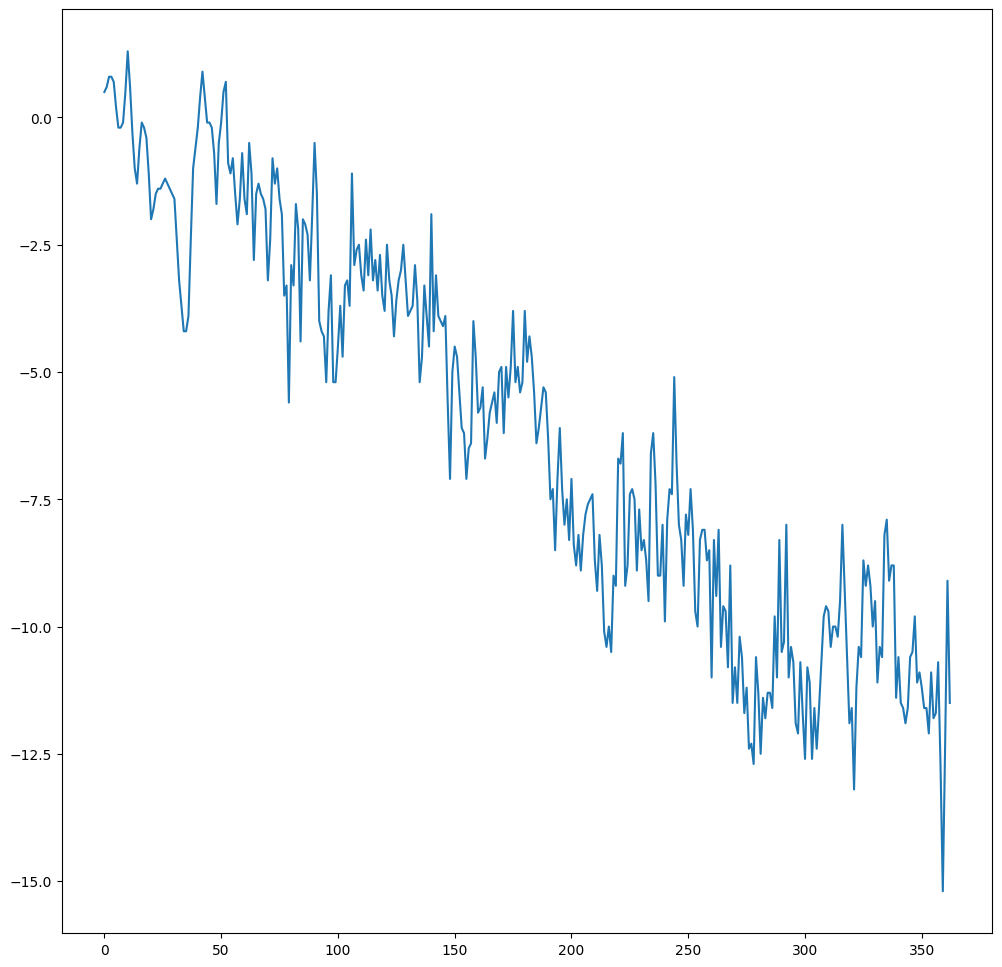

In [6]:
y=gdf['displacement'][0]
plt.figure(figsize=(12,12))
plt.plot(y)